Code for exploring the biomarker phenotype distributions.


Goals:
- Look at sex + age differences in these distributiosn
- Look at pre- vs post- menopause differences
- Look at menstrual cycle differences
- Look at hormone levels (T, E, etc)
- Check on whether there is data related to E, T, other hormone meds

In [1]:
require('tidyverse')

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# read in pheno matrix

biomarker_phe <- read.delim("/oak/stanford/groups/mrivas/projects/biomarkers/covariate_corrected/phenotypes/raw/biomarkers_serum_full.phe")



In [3]:
# only want the data from the FIRST visit
list_cols <- colnames(biomarker_phe)
visit_zero <- sapply(list_cols[2:ncol(biomarker_phe)], function(x) strsplit(x, ".", fixed=TRUE)[[1]][[3]]==0)
table(visit_zero)
biomarker_phe2 <- biomarker_phe[,list_cols[c(TRUE, visit_zero)]]
dim(biomarker_phe2)
# could look at second visit later
head(biomarker_phe2)

visit_zero
FALSE  TRUE 
  209   209 

[1] 502536    210

f.eid,f.30600.0.0,f.30601.0.0,f.30602.0.0,f.30603.0.0,f.30604.0.0,f.30605.0.0,f.30606.0.0,f.30610.0.0,f.30611.0.0,⋯,f.30884.0.0,f.30885.0.0,f.30886.0.0,f.30890.0.0,f.30891.0.0,f.30892.0.0,f.30893.0.0,f.30894.0.0,f.30895.0.0,f.30896.0.0
5586147,NA,2017-05-22,1,NA,NA,8,NA,114.3,2017-05-22,⋯,0,NA,1,67.8,2017-05-21,1,0,0,NA,1
5144865,NA,2017-09-01,2,NA,NA,8,NA,59.6,2017-09-01,⋯,0,NA,1,26.2,2017-09-01,2,0,0,NA,1
2845962,46.07,2017-07-04,1,1,0,NA,1,83.4,2017-07-04,⋯,0,NA,1,56.6,2017-07-02,1,0,0,NA,1
3390045,47.45,2017-03-13,1,1,0,NA,1,41.4,2017-03-12,⋯,0,NA,1,77.8,2017-03-11,1,0,0,NA,1
4264965,45.75,2017-02-06,1,1,0,NA,1,61.1,2017-02-06,⋯,0,NA,1,12.1,2017-02-06,1,0,0,NA,1
3131746,49.71,2016-10-26,1,1,0,NA,1,108.5,2016-10-26,⋯,0,NA,1,58.9,2016-10-26,1,0,0,NA,1


In [4]:
biomarker <- read.table("../phe_extraction/list_biomarker.txt", header=TRUE)
rownames(biomarker) <- biomarker$Field
head(biomarker)

,Field,name
30620,30620,Alanine aminotransferase
30600,30600,Albumin
30610,30610,Alkaline phosphatase
30630,30630,Apolipoprotein A
30640,30640,Apolipoprotein B
30650,30650,Aspartate aminotransferase


In [5]:
red_cols <- sapply(colnames(biomarker_phe2)[2:ncol(biomarker_phe2)], function(x) strsplit(x, ".", fixed=TRUE)[[1]][[2]])
colnames(biomarker_phe2) <- c("f.eid", red_cols)
direct_measurements <- (red_cols %in% biomarker$Field)
biomarker_phe3 <- biomarker_phe2[,colnames(biomarker_phe2)[c(TRUE, direct_measurements)]]

In [6]:
write.table(biomarker_phe3, file="../phe_extraction/sm_biomarker_tab.txt", row.names=FALSE) #TODO - change to fread

In [7]:
# write all of these out as phe files - SLOW
biomarker_df <- read.table("../phe_extraction/sm_biomarker_tab.txt", header=TRUE)
PHE_OUT_DIR <- '/scratch/PI/mrivas/users/erflynn/sex_div_gwas/phefiles'

write_out_phe <- function(phe_id){
    df_phe <- biomarker_df[,c("f.eid", phe_id)]  # structured as phe, visit, info, we want visit 1
    df_phe2 <- cbind(df_phe[,"f.eid"], df_phe)
    write.table(df_phe2, file=sprintf("%s/%s.phe", PHE_OUT_DIR, phe_id), row.names=FALSE, quote=FALSE, col.names=FALSE, sep="\t")
}

#sapply(biomarker$Field, write_out_phe)

In [8]:
# read in covariate data
COVARIATE_MATRIX <- '/oak/stanford/groups/mrivas/ukbb24983/sqc/ukb24983_GWAS_covar.phe'
cov_mat <- read.table(COVARIATE_MATRIX, header=TRUE)
cov_mat_sm <- cov_mat[,c("IID","age", "sex")]



In [9]:
# Filter out 151k sqc individuals
removal_file_one <- '/oak/stanford/groups/mrivas/ukbb/24983/sqc/ukb24983_remove.phe'
removal_file_two <- '/oak/stanford/groups/mrivas/ukbb/24983/sqc/w24983_20181016.csv'
remove1 <- read.table(removal_file_one, header=FALSE)
remove2 <- read.table(removal_file_two, header=FALSE) 
ids.to.remove <- c(remove1[,1], unique(remove2[,1]))
cov_mat_filt <- cov_mat_sm[!(cov_mat_sm$IID %in% ids.to.remove),]

In [10]:
head(cov_mat_filt)
combined_mat <- left_join(cov_mat_filt, biomarker_phe3, by=c("IID"="f.eid"))

,IID,age,sex
1,2502845,50,1
2,2314965,55,0
3,1142584,60,0
4,3665122,74,0
5,4377492,65,0
7,4015997,50,0


In [11]:
# SS factors
# menopause: 2724
# age at menopause: 3581
# menopause phenotype
#  - Pre-menopause: stated they have not reached menopause -AND- are less than 60 years old
#  - Post-menopause: >2 years post menopause -AND- had menopause after age 40
#  - Peri-menopause: w/in 2y menopause
#  - Premature_menopause: menopause after age 40
#  - Unknown: no info, or greater than 60y and says that not reached menopause

meno_age <- read.table("../data/menopause_age_data_pheno.txt", header=TRUE )

In [12]:
# period timing
# time since last period: 3700
# length of menstrual cycle: 3710
# menstruating today: 3720

cycle_dat <- read.table("../data/menstrual_phase.txt", header=TRUE)

pill_dat <- read.table("../data/pill_hrt.txt", header=TRUE)

In [13]:
head(meno_age)
head(pill_dat)

IID,meno,meno.age,age,sex,years.post,meno.label
1000010,NA,NA,NA,NA,NA,missing
1000028,FALSE,NA,54,0,NA,pre
1000034,NA,NA,68,1,NA,male
1000045,TRUE,54,79,0,25,post
1000052,TRUE,NA,72,0,NA,missing_age
1000069,TRUE,50,75,0,25,post


ID,pill,hrt
2829867,NA,NA
2809727,FALSE,NA
3025032,FALSE,NA
4662128,NA,NA
4621391,NA,NA
4563020,NA,NA


In [14]:
combined2 <- left_join(combined_mat, select(meno_age, c("IID", "meno.label")), by="IID")#by=c("IID"="ID"))

In [16]:
combined3 <- left_join(combined2, select(cycle_dat, c("ID", "phase")), by=c("IID"="ID"))
combined4 <- left_join(combined3, pill_dat, by=c("IID"="ID"))

In [18]:
combined3.2 <- combined4 %>% select(IID, age, sex, meno.label, phase, pill, hrt, everything())
head(combined3.2[,1:7])


IID,age,sex,meno.label,phase,pill,hrt
2502845,50,1,male,NA,NA,NA
2314965,55,0,missing,NA,FALSE,NA
1142584,60,0,post,NA,FALSE,FALSE
3665122,74,0,post,NA,NA,FALSE
4377492,65,0,post,NA,FALSE,NA
4015997,50,0,pre,menstrual,FALSE,NA


In [21]:
table(combined3.2[,c("meno.label", "hrt")])
table(combined3.2[,c("meno.label", "pill")])

# create a new phenotype w/ hrt+pill and meno.label
table(combined3.2[,c("hrt", "pill")]) # <--- should probably get rid of those on HRT -AND- the pill


             hrt
meno.label    FALSE  TRUE
  male            0     0
  missing     11700  4327
  missing_age  4241   634
  peri            1     0
  post        39610  4762
  pre           489   272
  premature    3858   785
  unlikely      407   274

             pill
meno.label    FALSE  TRUE
  male            0     0
  missing     22848   429
  missing_age  5479    24
  peri          187    14
  post        79854   235
  pre         28954  2506
  premature    5205    10
  unlikely     3263    94

       pill
hrt     FALSE  TRUE
  FALSE 48544    26
  TRUE   9824    44

In [33]:
table(combined3.2$pill)
table(combined3.2[,c("pill", "phase")])


 FALSE   TRUE 
145790   3312 

       phase
pill    follicular luteal menstrual
  FALSE       8108  11388      4650
  TRUE         534    702       257

In [36]:
label_col <- function(meno.label, pill, hrt, phase){
    if (!is.na(hrt) & hrt==TRUE){
        return("hrt")
    } 
    if (!is.na(phase) & phase=="menstrual"){
        if (!is.na(pill) & pill==TRUE){
            return("pill_menstrual")
        } else {
        return("menstrual")
            }
    }
    if (!is.na(pill) & pill==TRUE){
        return("pill")
    } else {
        return(as.character(meno.label))
    }
}
 



combined3.2$comb_phe <- mapply(label_col, combined3.2$meno.label, combined3.2$pill, combined3.2$hrt, combined3.2$phase)

In [37]:
table(combined3.2$comb_phe)


           hrt           male      menstrual        missing    missing_age 
         11054         156117           5045          23167           6539 
          peri           pill pill_menstrual           post            pre 
           171           3012            256          95702          26995 
     premature       unlikely 
          5883           3210 

In [40]:
require('reshape2')
dat.melted <- melt(combined3.2, id.vars=c("IID", "age", "sex", "meno.label", "phase", "pill", "hrt", "comb_phe"))
head(dat.melted)

IID,age,sex,meno.label,phase,pill,hrt,comb_phe,variable,value
2502845,50,1,male,NA,NA,NA,male,30600,45.64
2314965,55,0,missing,NA,FALSE,NA,missing,30600,NA
1142584,60,0,post,NA,FALSE,FALSE,post,30600,47.06
3665122,74,0,post,NA,NA,FALSE,post,30600,47.47
4377492,65,0,post,NA,FALSE,NA,post,30600,48.13
4015997,50,0,pre,menstrual,FALSE,NA,menstrual,30600,45.92


In [39]:
write.table(combined3.2, file="../data/hormone_phe_data.txt", sep="\t", row.names=FALSE, quote=FALSE)

In [ ]:
# TODO - add menstrual phase! this is relevant and when E is lowest

In [41]:

dat2 <- dat.melted %>% filter(!is.na(value))

    

In [25]:
# group means for sex
group_means <- dat2 %>% group_by(sex, variable) %>% summarize(mean_val=mean(value),sd_val=sd(value))
head(group_means) 
group_means$sex <- as.factor(group_means$sex)
group_means$variable <- sapply(group_means$variable, as.character)
biomarker$Field <- sapply(biomarker$Field, as.character)

group_means2 <- full_join(group_means, biomarker[,c("Field", "name")], by=c("variable"="Field"))
head(group_means2)

sex,variable,mean_val,sd_val
0,30600,44.985997,2.5861501
0,30610,84.985266,27.7202035
0,30620,20.266769,12.1533011
0,30630,1.638494,0.2663518
0,30640,1.040757,0.2380158
0,30650,24.493638,9.5252283


sex,variable,mean_val,sd_val,name
0,30600,44.985997,2.5861501,Albumin
0,30610,84.985266,27.7202035,Alkaline phosphatase
0,30620,20.266769,12.1533011,Alanine aminotransferase
0,30630,1.638494,0.2663518,Apolipoprotein A
0,30640,1.040757,0.2380158,Apolipoprotein B
0,30650,24.493638,9.5252283,Aspartate aminotransferase


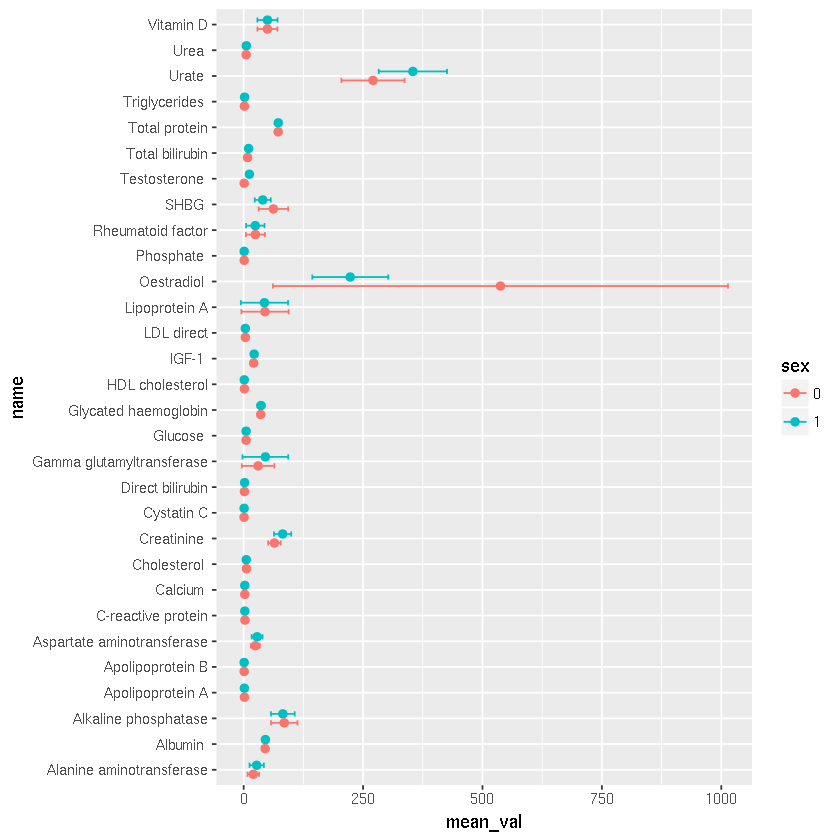

In [26]:
ggplot(group_means2, aes(x=name, y=mean_val, colour=sex )) +
       geom_errorbar(aes(ymin=mean_val-sd_val, ymax=mean_val+sd_val), width=0.4, position=position_dodge(0.7))+
geom_point(size=2, position=position_dodge(0.7)) + coord_flip()

# TODO - facet data


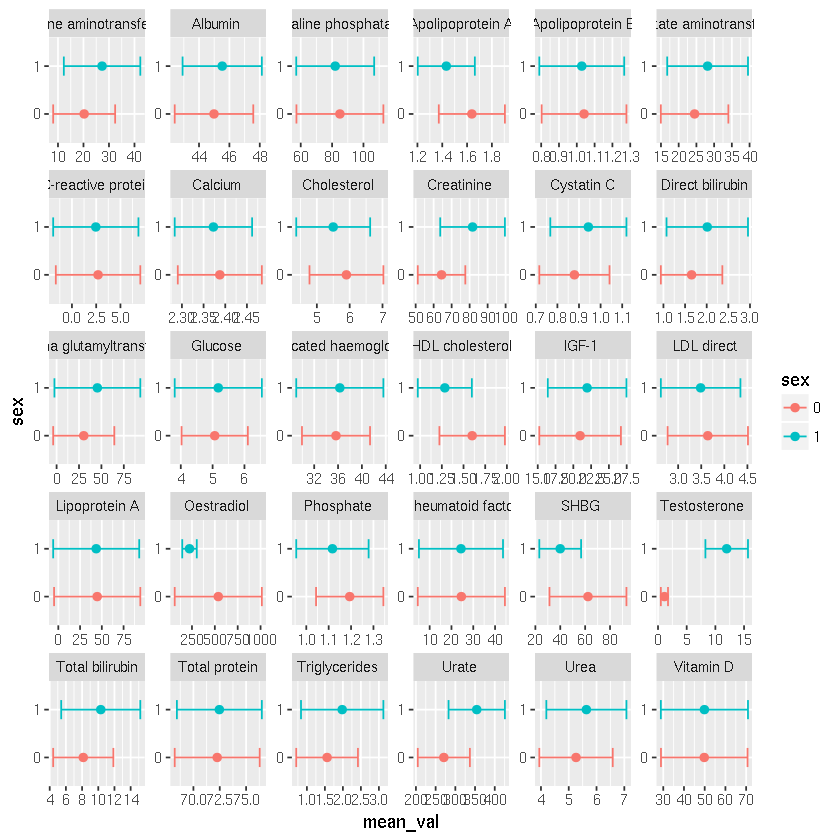

In [28]:
ggplot(group_means2, aes(x=sex, y=mean_val, colour=sex )) +
       geom_errorbar(aes(ymin=mean_val-sd_val, ymax=mean_val+sd_val), width=0.4, position=position_dodge(0.7))+
geom_point(size=2, position=position_dodge(0.7)) + coord_flip() +facet_wrap(~name, scales="free")

In [ ]:
oestradiol <-dat2 %>% filter(variable=="30800", comb_phe %in% c("hrt", "male", "menstral", "pre", "pill"))
oestradiol$comb_phe <- as.factor(oestradiol$comb_phe)
ggplot(oestradiol, aes(y=value, x=comb_phe, colour=comb_phe))+geom_violin()+ stat_summary(fun.data=data_summary)+ylim(0, 1000)

comb_phe,variable,mean_val,sd_val
hrt,30600,44.216822,2.6477493
hrt,30610,74.807752,23.5743440
hrt,30620,18.979248,10.8002547
hrt,30630,1.691808,0.3119557
hrt,30640,1.035794,0.2284538
hrt,30650,23.529529,7.7160416


comb_phe,variable,mean_val,sd_val,name
hrt,30600,44.216822,2.6477493,Albumin
hrt,30610,74.807752,23.5743440,Alkaline phosphatase
hrt,30620,18.979248,10.8002547,Alanine aminotransferase
hrt,30630,1.691808,0.3119557,Apolipoprotein A
hrt,30640,1.035794,0.2284538,Apolipoprotein B
hrt,30650,23.529529,7.7160416,Aspartate aminotransferase


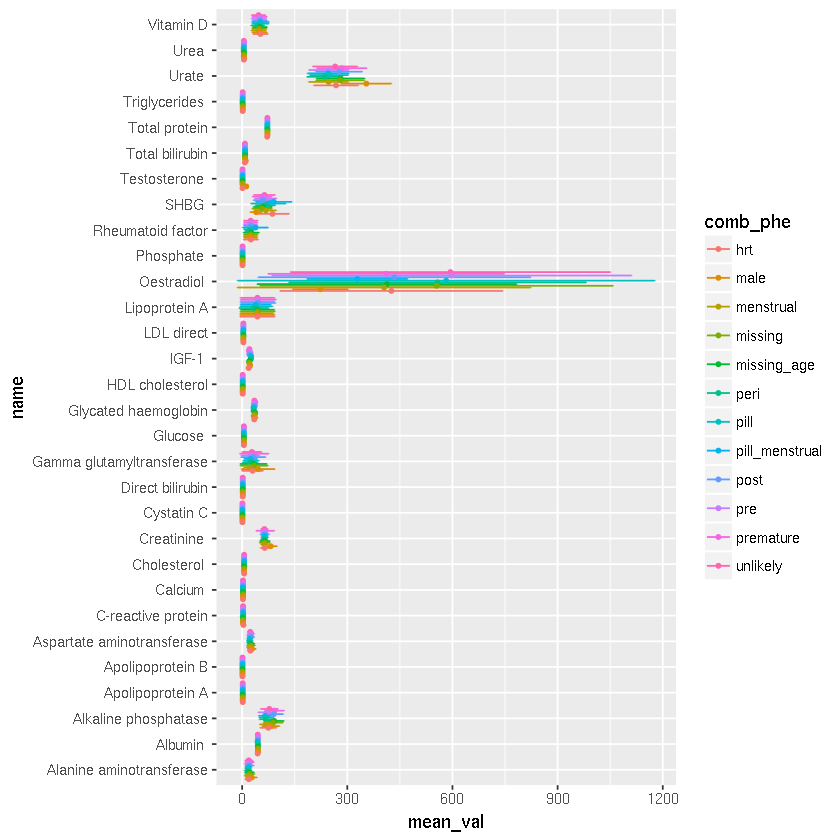

In [43]:
# summarize by menopausal status
group_means <- dat2 %>% group_by( comb_phe, variable) %>% summarize(mean_val=mean(value),sd_val=sd(value))
#group_means <- group_means %>% filter(meno.label %in% c("male", "pre", "post"))
head(group_means) 
group_means$comb_phe <- as.factor(group_means$comb_phe)
group_means$variable <- sapply(group_means$variable, as.character)
biomarker$Field <- sapply(biomarker$Field, as.character)

group_means2 <- full_join(group_means, biomarker[,c("Field", "name")], by=c("variable"="Field"))
head(group_means2)
ggplot(group_means2, aes(x=name, y=mean_val, colour=comb_phe )) +
       geom_errorbar(aes(ymin=mean_val-sd_val, ymax=mean_val+sd_val), width=0.3, position=position_dodge(0.8))+
geom_point(size=1, position=position_dodge(0.8))+ coord_flip()


In [37]:
head(dat2)

IID,age,sex,meno.label,phase,variable,value
2502845,50,1,male,NA,30600,45.64
1142584,60,0,post,NA,30600,47.06
3665122,74,0,post,NA,30600,47.47
4377492,65,0,post,NA,30600,48.13
4015997,50,0,pre,menstrual,30600,45.92
2076736,60,0,post,NA,30600,43.68


phase,variable,mean_val,sd_val,name
follicular,30600,44.8582451,2.5373589,Albumin
follicular,30610,69.6664981,24.5041326,Alkaline phosphatase
follicular,30620,17.1978749,9.8333945,Alanine aminotransferase
follicular,30630,1.5959763,0.2548465,Apolipoprotein A
follicular,30640,0.9501325,0.2083830,Apolipoprotein B
follicular,30650,21.9140713,8.7563127,Aspartate aminotransferase


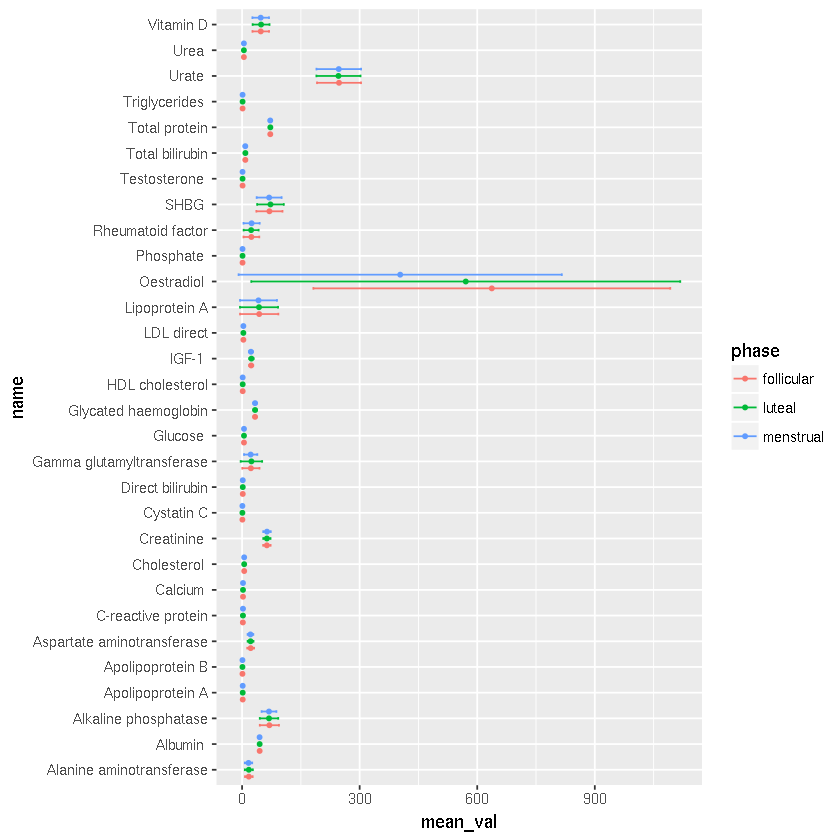

In [40]:
# group by menstrual phase - but ADJUST

group_means <- dat2 %>% group_by( phase, variable) %>% summarize(mean_val=mean(value),sd_val=sd(value))
group_means <- group_means %>% filter(!is.na(phase))
group_means$phase <- as.factor(group_means$phase)
group_means$variable <- sapply(group_means$variable, as.character)
biomarker$Field <- sapply(biomarker$Field, as.character)

group_means2 <- full_join(group_means, biomarker[,c("Field", "name")], by=c("variable"="Field"))
head(group_means2)
ggplot(group_means2, aes(x=name, y=mean_val, colour=phase )) +
       geom_errorbar(aes(ymin=mean_val-sd_val, ymax=mean_val+sd_val), width=0.3, position=position_dodge(0.8))+
geom_point(size=1, position=position_dodge(0.8))+ coord_flip()


In [58]:
dat3 <- filter(combined3.2, !is.na(phase))

res.aov <- aov(dat3$`30630` ~ dat3$phase)
summary(res.aov)

# need some sort of random grouping....

               Df Sum Sq Mean Sq F value Pr(>F)    
dat3$phase      2    4.8  2.3989   37.04 <2e-16 ***
Residuals   24087 1559.9  0.0648                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
4018 observations deleted due to missingness

In [43]:
cycle_comb <- left_join(combined2, cycle_dat, by=c("IID"="ID"))

In [49]:
filter(biomarker, name=="Oestradiol ")
# plot moving window on E, etc levels

IID,age,sex,30600,30610,30620,30630,30640,30650,30660,⋯,30860,30870,30880,30890,meno.label,day_in_cycle,cycle_length,meno_today,approx_ov,phase
2502845,50,1,45.64,55.3,30.11,1.296,1.068,28.2,2.55,⋯,70.04,1.390,374.1,68.8,male,NA,NA,NA,NA,NA
2314965,55,0,NA,49.5,17.03,NA,1.619,18.2,NA,⋯,NA,3.386,NA,NA,missing,NA,NA,NA,NA,NA
1142584,60,0,47.06,176.2,42.71,1.605,0.815,45.2,1.73,⋯,72.76,1.671,266.6,55.1,post,NA,NA,NA,NA,NA
3665122,74,0,47.47,62.7,19.66,1.788,1.423,24.1,1.53,⋯,76.86,1.311,290.2,73.6,post,NA,NA,NA,NA,NA
4377492,65,0,48.13,88.0,34.51,1.720,1.249,25.2,1.22,⋯,71.06,2.506,312.3,51.9,post,NA,NA,NA,NA,NA
4015997,50,0,45.92,74.9,12.72,1.384,0.893,16.1,1.33,⋯,73.14,0.780,306.9,56.5,pre,0,28,2,14,menstrual


Field,name
30800,Oestradiol
